In [32]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Layer, Input, Bidirectional, LSTM, GlobalMaxPool1D, Concatenate, Reshape, Lambda
from keras.datasets import mnist
from keras.models import Model
import tensorflow as tf
import keras.backend as K

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Training data size : {x_train.shape}')
print(f'Testing data size : {x_test.shape}')

Training data size : (60000, 28, 28)
Testing data size : (10000, 28, 28)


In [49]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [50]:
x_train /= 255
x_test /= 255

In [51]:
x_train.max()

1.0

In [52]:
class Rotate90Layer(Layer):
    def __init__(self, **kwargs):
        super(Rotate90Layer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        super(Rotate90Layer, self).build(input_shape)
        
    def call(self, inputs):
        return tf.image.rot90(inputs)
        
    # def compute_output_shape(self, input_shape):
    #     return (input_shape[0], input_shape[2], input_shape[1])

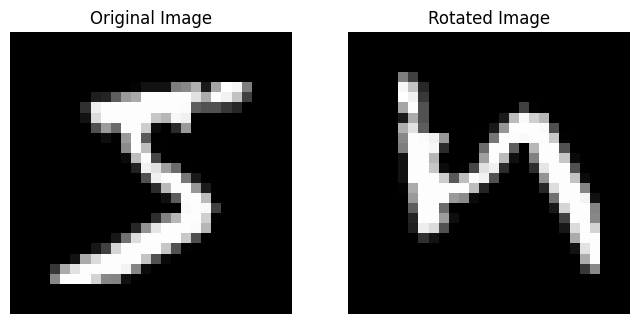

In [53]:
sample_image = x_train[0]

# Add batch dimension to the sample image
sample_image = tf.expand_dims(sample_image, axis=0)

# Define a model with the Rotate90Layer
model = tf.keras.Sequential([
    Rotate90Layer(input_shape=(28, 28, 1))
])

# Get the rotated image
rotated_image = model(sample_image)

# Remove the batch dimension
rotated_image = tf.squeeze(rotated_image, axis=0)

# Plot the original and rotated images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(tf.squeeze(sample_image), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(tf.squeeze(rotated_image), cmap='gray')
plt.axis('off')

plt.show()

In [59]:
i = Input(shape=(28, 28, 1))
x = Reshape((28, 28)) (i)
x = Bidirectional(LSTM(128, return_sequences=True)) (x)
x = GlobalMaxPool1D() (x)

upper = Model(i, x, name='upper')
upper.summary()

Model: "upper"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 reshape_10 (Reshape)        (None, 28, 28)            0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 28, 256)          160768    
 onal)                                                           
                                                                 
 global_max_pooling1d_8 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
Total params: 160,768
Trainable params: 160,768
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# permutor = Lambda(LSTM(lambda t : K.permute_dimensions(t, pattern=(0, 2, 1))))

In [60]:
i = Input(shape=(28, 28, 1))
x = Rotate90Layer() (i)
x = Reshape((28, 28)) (x)
x = Bidirectional(LSTM(128, return_sequences=True)) (x)
x = GlobalMaxPool1D() (x)

lower = Model(i, x, name='lower')
lower.summary()

Model: "lower"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 rotate90_layer_16 (Rotate90  (None, 28, 28, 1)        0         
 Layer)                                                          
                                                                 
 reshape_11 (Reshape)        (None, 28, 28)            0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 28, 256)          160768    
 onal)                                                           
                                                                 
 global_max_pooling1d_9 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                             

In [61]:
i = Input(shape=(28, 28, 1))
upper_output = upper(i)
lower_output = lower(i)
x = Concatenate()([upper_output, lower_output])
x = Dense(10, activation='softmax') (x)

model = Model(i, x)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 upper (Functional)             (None, 256)          160768      ['input_18[0][0]']               
                                                                                                  
 lower (Functional)             (None, 256)          160768      ['input_18[0][0]']               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 512)          0           ['upper[0][0]',                  
                                                                  'lower[0][0]']            

In [62]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [63]:
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    workers=8,
    batch_size=32,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 70s 34ms/step - loss: 0.2153 - accuracy: 0.9359 - val_loss: 0.0791 - val_accuracy: 0.9769
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0800 - accuracy: 0.9748 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0654 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0483 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0375 - accuracy: 0.9885 - val_loss: 0.0454 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0396 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0428 -

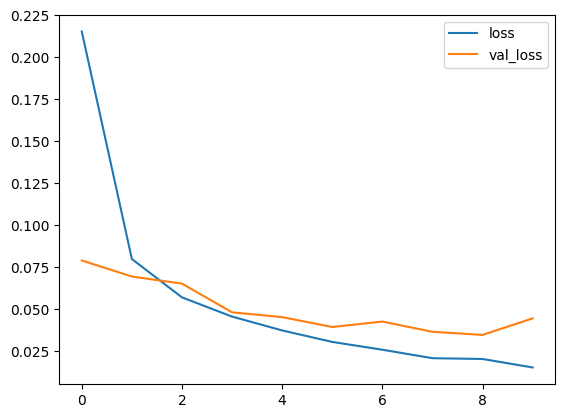

In [64]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

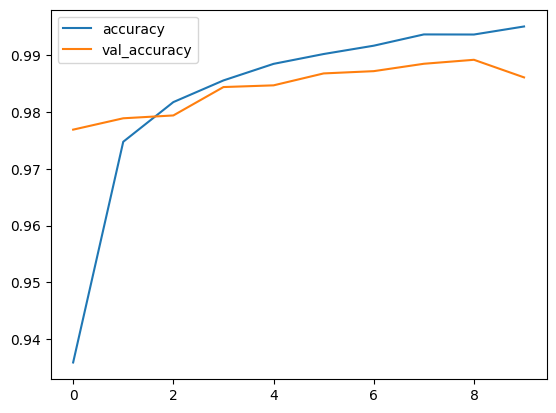

In [65]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()